In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2020-1-deeplearning-final/submission_sample.csv
/kaggle/input/2020-1-deeplearning-final/train.csv
/kaggle/input/2020-1-deeplearning-final/test.csv


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


In [3]:
tr = pd.read_csv('/kaggle/input/2020-1-deeplearning-final/train.csv')
te = pd.read_csv('/kaggle/input/2020-1-deeplearning-final/test.csv')
tr.drop_duplicates(subset=['raw','chr_token','nn_token'], inplace=True) #중복리뷰 제거
tr_id = tr.iloc[:,:1]
te_id = te.iloc[:,:1]
tr.head(1)

,id,rating,raw,chr_token,nn_token
0,R024795,1,1982년도에 이런영화가 제작이 됐다는거 자체가 놀라운거라고. 재미없다고 씨부리는것...,1 9 8 2 년 도 에 이 런 영 화 가 제 작 이 됐 다 는 거 자 체 가 놀 ...,년도 영화 제작 거 자체 거 씨 것 엄매 뱃속 정자 난자 전 리를리감 독 전구 에디...


## raw 데이터를 가지고 진행했습니다.

In [4]:
tr.drop_duplicates(['raw'], keep='first')
#tr.drop_duplicates(['nn_token'], keep='first')
#tr.drop_duplicates(['chr_token'], keep='first')

,id,rating,raw,chr_token,nn_token
0,R024795,1,1982년도에 이런영화가 제작이 됐다는거 자체가 놀라운거라고. 재미없다고 씨부리는것...,1 9 8 2 년 도 에 이 런 영 화 가 제 작 이 됐 다 는 거 자 체 가 놀 ...,년도 영화 제작 거 자체 거 씨 것 엄매 뱃속 정자 난자 전 리를리감 독 전구 에디...
1,R068332,1,핸드핼드기법을 적절히 써가며 현실과 환상의 대비를 확연하게 보여주는 영화,핸 드 핼 드 기 법 을 적 절 히 써 가 며 현 실 과 환 상 의 대 비 를 확 ...,핸드 핼드 기법 현실 환상 대비 영화
2,R027236,1,....엑스맨을 깔끔하게 정리를 했다는 자체가 이미 뛰어난 영화라는 것을 증명하고 있다,. . . . 엑 스 맨 을 깔 끔 하 게 정 리 를 했 다 는 자 체 가 이 미 ...,엑스맨 정리 자체 영화 것 증명
3,R050965,0,뭐 이런 쓰레기 영화가 다있냐 인물관계도 정리안해줘 줄거리도 없어 내용도 ㅉㅉ,뭐 이 런 쓰 레 기 영 화 가 다 있 냐 인 물 관 계 도 정 리 안 해 줘 줄 ...,쓰레기 영화 인물 관계 정리안 줄거리 내용 ㅉ
4,R016317,0,육식공룡중에서 빌딩보다 더큰공룡이어딧노 ㅋㅋㅋㅋㅋㅋ,육 식 공 룡 중 에 서 빌 딩 보 다 더 큰 공 룡 이 어 딧 노 ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ,육식 공 룡 중 빌딩 공룡 어딧노 ㅋ ㅋ
...,...,...,...,...,...
54505,R035861,1,그땐 웃기고 재밌엇따고 90년도에 한국영화 퀄리티 어땟나봐라 영구땡칠이 슈발,그 땐 웃 기 고 재 밌 엇 따 고 9 0 년 도 에 한 국 영 화 퀄 리 티 어 ...,그때 년도 한국 영화 퀄리티 어땟나 영구땡칠 슈발
54506,R052223,0,주상욱이 큰 빚이 있나..아무거나 막 찍는듯;;; 아님 시나리오 보는 눈이 진짜 안...,주 상 욱 이 큰 빚 이 있 나 . . 아 무 거 나 막 찍 는 듯 ; ; ; 아 ...,주상욱 빚 아 시나리오 눈 진 안습
54507,R021253,0,내가 웬만해서는 평점 안남기는데 보는 내내 기괴하다고 생각했다 결말도 이상하고.. ...,내 가 웬 만 해 서 는 평 점 안 남 기 는 데 보 는 내 내 기 괴 하 다 고 ...,평점 안 생각 결말 이상 제정신 것 산
54508,R047320,1,하정우씨 매력 넘치네요. 공효진씨의 인간적인 고민들은 의외지만 오히려 친근하게 다가...,하 정 우 씨 매 력 넘 치 네 요 . 공 효 진 씨 의 인 간 적 인 고 민 들 ...,하정우 씨 매력 공효진 씨 인간 고민 의외 것 휴식 생각 영화 여럿 휴식


In [5]:
#중복된 리뷰를 제거하고, tr,te파일에 각각 정규 표현식을 진행했습니다.

tr.drop_duplicates(subset = ['raw'], inplace=True)
tr['raw'] = tr['raw'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") 
te['raw'] = te['raw'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") 

In [6]:
# 인터넷에서 불용어 목록이 있길래 불러왔습니다.
b2 = '이VCP0.018279601 있VA0.011699048 하VV0.009773658 것NNB0.00973315 들XSN0.00689824 그MM0.005327252 되VV0.00361335 수NNB0.003473622 이NP0.003361203 보VX0.003310379 않VX0.0029757 없VA0.002920476 나NP0.002690479 사람NNG0.002073917 주VV0.001884579 아니VCN0.001870774 등NNB0.001822074 같VA0.001724522 우리NP0.001714509 때NNG0.001685684 년NNB0.001647755 가VV0.001618626 한MM0.001584036 지VX0.001537763 대하VV0.00150378 오VV0.001490884 말NNG0.001321876 일NNG0.001239799 그렇VA0.001232062 위하VV0.001170618 때문NNB0.001146647 그것NP0.001099161 두VV0.001063053 말하VV0.001030587 알VV0.000995693 그러나MAJ0.000978246 받VV0.000924084 못하VX0.000904665 일NNB0.000880239 그런MM0.000879481 또MAG0.000870985 문제NNG0.000823954 더MAG0.000801652 사회NNG0.000793459 많VA0.000789211 그리고MAJ0.000779653 좋VA0.000763723 크VA0.000758565 따르VV0.000738084 중NNB0.000733229 나오VV0.000725188 가지VV0.000720485 씨NNB0.000710169 시키XSV0.000707893 만들VV0.000703797 지금NNG0.000699701 생각하VV0.000694846 그러VV0.000692418 속NNG0.00068544 하나NR0.000655097 집NNG0.000648573 살VV0.000648422 모르VV0.000645084 적XSN0.000643112 월NNB0.000639319 데NNB0.000636436 자신NNG0.000632188 안MAG0.000625968 어떤MM0.000623237 내NP0.000622023 내VV0.000614438 경우NNG0.000613831 명NNB0.00061019 생각NNG0.000587433 시간NNG0.00057302 그녀NP0.000571806 다시MAG0.00055618 이런MM0.000550263 앞NNG0.000548898 보이VV0.000542678 번NNB0.000542526 나VX0.000538126 다른MM0.000536306 어떻VA0.000533423 여자NNG0.000531754 개NNB0.000530085 전NNG0.00052872 들VV0.000514914 사실NNG0.000511728 이렇VA0.000511576 점NNG0.000507935 싶VX0.000504749 말VX0.000503991 정도NNG0.000496102 좀MAG0.000492916 원NNB0.000492309 잘MAG0.000491399 통하VV0.000486847 소리NNG0.000485633 놓VX0.000482751'

In [7]:
# re를 이용해서 불용어 정리
import re

p = re.compile("[^0-9]")
b2 = "".join(p.findall(b2))
p = re.compile("[^A-Z]")
b2 = "".join(p.findall(b2)).replace('.',"")
print(b2)

이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 소리 놓


In [8]:
stop_words_100 = b2.split(' ')

In [9]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','로써']
for i in stopwords :
    stop_words_100.append(i)

In [10]:
stopwords = list(set(stop_words_100))

In [14]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 448 kB 19.2 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 3.8 MB/s  eta 0:00:01
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.0
    Uninstalling beautifulsoup4-4.9.0:
      Successfully uninstalled beautifulsoup4-4.9.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [15]:
from konlpy.tag import Okt
okt = Okt()

In [16]:
print(tr.shape)
print(te.shape)

(54480, 5)
(13626, 4)


In [17]:
#tr 파일을 형태소 분석기를 사용하여 X_train 리스트에 저장
X_train = []
for sentence in tr['raw']:
    temp_X = []
    #동시에 토큰화와 불용어를 제거 하였습니다.
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_train.append(temp_X)

In [18]:
print(X_train[:5])
#토큰화 확인

[['년도', '영화', '제작', '돼다', '자체', '놀랍다', '재미없다', '씨부리다', '들다', '니', '엄매', '뱃속', '커녕', '정자', '난자', '되다', '기전', '리', '리', '감독', '걸', '만들다', '전구', '로', '치면', '에디슨', '전화기', '로치', '면', '벨', '자동차', '로', '치면', '포드', '알다'], ['핸드', '핼드', '기법', '을', '적절하다', '써다', '현실', '환상', '대비', '확연', '보여주다', '영화'], ['엑스맨', '을', '깔끔하다', '정리', '자체', '이미', '뛰어나다', '영화', '라는', '을', '증명', '하고', '있다'], ['뭐', '이렇다', '쓰레기', '영화', '다', '있다', '인물관계도', '정리', '안해', '주다', '줄거리', '없다', '내용', 'ㅉㅉ'], ['육식', '공룡', '에서', '빌딩', '보다', '크다', '공룡', '이다', '딧노', 'ㅋㅋㅋㅋㅋㅋ']]


In [19]:
#te 파일도 같은 방식으로 진행하였습니다.
X_test = []
for sentence in te['raw']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) 
    temp_X = [word for word in temp_X if not word in stopwords] 
    X_test.append(temp_X)

In [20]:
print(X_test[:5])

[['감독', '넘다', '제멋대로', '자유분방하다', '만들다', '같다', '보구', '나서다', '느낌', '모', '이영화'], ['제작사', '감독', '에게', '할복', '을', '요청', '하고', '싶다', '본영', '화', '최', '대망', '작'], ['드라마', '재미', '있다', '모든', '출연자', '자알', '단', '추잡', '스럽다', '드라마', '질', '을', '떨어뜨리다', '입술', '성형', '을', '잘못', '처음', '나오다', '부터', '부르트다', '벌겋다', '지저분하다', '매우', '엮겨웠', '고', '여전하다', '추잡', '스럽다', '서리'], ['초등', '생인', '첫째', '아이', '어리다', '좋아하다', '토마스', '보다', '재밌다', '둘째', '너무', '좋아하다', '아이', '함께', '보기', '좋다', '영화', '이다'], ['중국', '을', '보다', '미모', '연기력', '을', '다', '갖추다', '중국', '아이콘', '을', '보다']]


In [21]:
print(tr.shape[0])
print(te.shape[0])
print(len(X_train))
print(len(X_test))
#길이 확인

54480
13626
54480
13626


In [22]:
#저장ㄱㄱ (시간오래걸림)
#X_train_1 = X_train
#X_test_1 = X_test

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [24]:
print(len(tokenizer.word_index)) #단어사진의 len -> 길어서 렉걸림

37150


In [25]:
threshold = 3 # 기준이 되는 등장빈도수
total_cnt = len(tokenizer.word_index) # 단어의 수를 의미
rare_cnt = 0 # 등장 빈도수가 기준보다 작은 희귀단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 희귀 단어 등장 빈도수의 총 합

# 단어와 빈도수를 key와 value로 각각 설정
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt += 1
        rare_freq += value

print('단어 집합의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합의 크기 : 37150
등장 빈도가 2번 이하인 희귀 단어의 수: 20668
단어 집합에서 희귀 단어의 비율: 55.633916554508744
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.6760556049984126


In [26]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2(3-1)이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 16483


In [27]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [28]:
print(X_train[:5])


[[537, 1, 586, 223, 144, 1980, 99, 8630, 42, 185, 11794, 2848, 6585, 8631, 8, 2461, 765, 765, 31, 82, 23, 11795, 11, 2972, 11796, 8632, 87, 3100, 2060, 11, 2972, 3032, 57], [4969, 11797, 1425, 3, 1218, 328, 115, 838, 3328, 9409, 116, 1], [3476, 3, 1395, 2387, 144, 913, 714, 1, 128, 3, 2802, 35, 5], [59, 39, 52, 1, 9, 5, 13637, 2387, 2973, 41, 613, 4, 38, 598], [8633, 2233, 16, 6962, 2, 157, 2233, 6, 1893]]


In [29]:
#타깃 설정(0,1)

y_train = np.array(tr['rating'])
tr_rating = np.array(tr['rating'])
#y_test = np.array(test_data['label'])

In [30]:
print(len(X_train))
print(len(X_test))

54480
13626


In [31]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [32]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

54473
54473


리뷰의 최대 길이 : 68
리뷰의 평균 길이 : 17.164393369192076


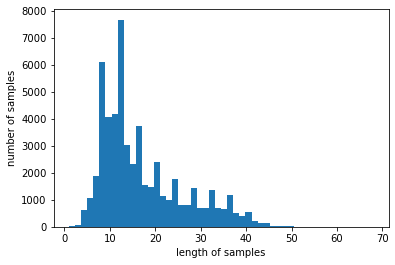

In [33]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [34]:
def below_threshold_len(max_len, nested_list):
    cnt= 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [35]:
max_len = 30 #최대 길이
below_threshold_len(max_len, X_train)

전체 중 길이가 30 이하인 샘플의 비율: 87.81965377342904


In [36]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [37]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [38]:
tr_rating = y_train

In [39]:
print(len(y_train))
print(len(tr_rating))

54473
54473


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train,
                                                    tr_rating,
                                                 test_size=0.2,
                                                    stratify=tr_rating
                                                   )

In [41]:
#얼리스탑이랑, 베스트모델 저장 옵션
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [42]:
#?
model = Sequential()
#model.add(Embedding(vocab_size, 90, input_length=max_len))
#model.add(Flatten())
model.add(Embedding(vocab_size+1, 100))
model.add(LSTM(128))#, return_sequences=True))
#model.add(GRU(128))
#model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1648400   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,765,777
Trainable params: 1,765,777
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='rmsprop', #rmsprop 옵티마이저 설정
              #optimizers.RMSprop(lr=0.001),#'rmsprop',
        #optimizer='adam', #아담 활성화 함수는 결과값이 불안정했다.
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=20, callbacks=[es, mc],
                    batch_size=50,
                    validation_split=0.2)

Epoch 1/20
698/698 [==============================] - ETA: 0s - loss: 0.4091 - acc: 0.8130
Epoch 00001: val_acc improved from -inf to 0.84293, saving model to best_model.h5
698/698 [==============================] - 36s 52ms/step - loss: 0.4091 - acc: 0.8130 - val_loss: 0.3543 - val_acc: 0.8429
Epoch 2/20
698/698 [==============================] - ETA: 0s - loss: 0.3191 - acc: 0.8638
Epoch 00002: val_acc improved from 0.84293 to 0.84408, saving model to best_model.h5
698/698 [==============================] - 36s 52ms/step - loss: 0.3191 - acc: 0.8638 - val_loss: 0.3585 - val_acc: 0.8441
Epoch 3/20
698/698 [==============================] - ETA: 0s - loss: 0.2918 - acc: 0.8777
Epoch 00003: val_acc improved from 0.84408 to 0.84821, saving model to best_model.h5
698/698 [==============================] - 36s 52ms/step - loss: 0.2918 - acc: 0.8777 - val_loss: 0.3432 - val_acc: 0.8482
Epoch 4/20
698/698 [==============================] - ETA: 0s - loss: 0.2684 - acc: 0.8881
Epoch 00004: va

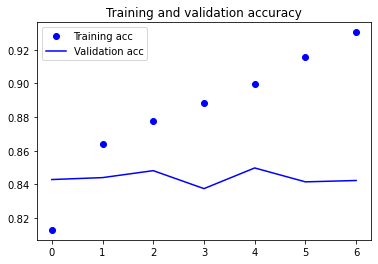

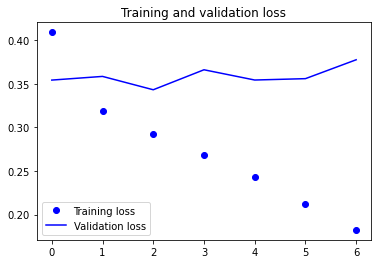

In [44]:
#모델 히스토리 시각화

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# V_로스가 엉망이다.

In [45]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))
#테스트 정확도: 0.8495
# 테스트 정확도: 0.8503
#  테스트 정확도: 0.8505
#  테스트 정확도: 0.8511
# 테스트 정확도: 0.8527
#  테스트 정확도: 0.8539
# 테스트 정확도: 0.8548

341/341 [==============================] - 3s 8ms/step - loss: 0.3541 - acc: 0.8541

 테스트 정확도: 0.8541


In [46]:
model.evaluate(x_test, y_test)
#[0.39457014203071594, 0.8442404866218567]
#[0.41452452540397644, 0.8343276977539062]
#[0.42926737666130066, 0.8325837254524231]
#[0.3946966826915741, 0.8419458270072937]
#[0.4036385118961334, 0.8388251662254333]
#[0.39832717180252075, 0.8403854966163635]
#[0.379427433013916, 0.8447911739349365]
#[0.38031452894210815, 0.8416705131530762]
#[0.39813297986984253, 0.846612811088562]

341/341 [==============================] - 3s 8ms/step - loss: 0.3751 - acc: 0.8497


[0.3750552237033844, 0.8497475981712341]

In [47]:
pred = loaded_model.predict_classes(x_test)
pred = pred.flatten()

In [48]:
(pred==y_test).mean()
#0.8494722349701698
#0.8502983019733823
#0.8504818724185406
#0.8491968793024323
#0.8511243689765947
#0.8525011473152823
#0.8538779256539697
#0.8547824490545254

0.8540614960991281

In [49]:
pred = loaded_model.predict_classes(X_test)
pred = pred.flatten()

In [50]:
pred.shape[0]

13626

In [51]:
submit = pd.DataFrame({'id':te.id, 'pred':pred})
submit.head()

,id,pred
0,R009132,0
1,R045659,0
2,R015196,0
3,R063595,1
4,R053340,1


In [52]:
submit.to_csv('submit_kkj214_6_25_최종.csv', index=False)